# Iris classification practice

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import recall_score, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix
import collections
%matplotlib inline

In [117]:
iris_df = sns.load_dataset('iris')
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [118]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# EDA

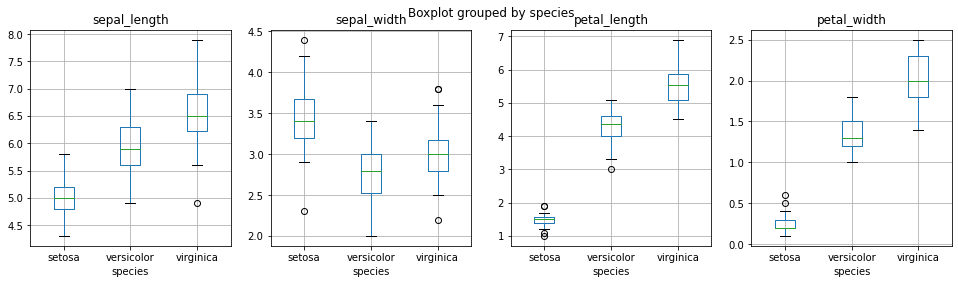

In [119]:
features = iris_df.columns[:-1]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for idx, feature in enumerate(features):
    iris_df.boxplot(column=feature, by='species', ax=ax[idx])

In [120]:
iris_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [121]:
spec_encoder = LabelEncoder()
iris_df['species_id'] = spec_encoder.fit_transform(iris_df['species'])
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


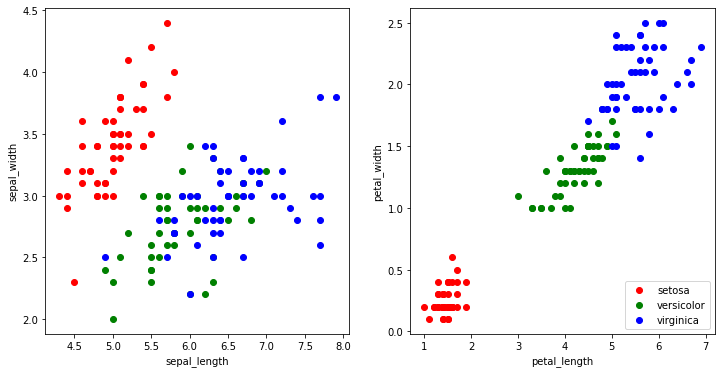

In [213]:
# colors = ['red', 'green', 'blue']
# species = list(iris_df.species.unique())
# spec_color = collections.defaultdict(dict)
# for spec, color in zip(species, colors):
#     spec_color[spec]=color
#     spec_spec[spec] = spec
# iris_df.plot(kind='scatter',x='sepal_length', y='sepal_width',
#              title="Sepal_length vs sepal_width",
#              c=iris_df['species'].map(spec_color));
# plt.show();

colors = ['red', 'green', 'blue']
species = list(iris_df.species.unique())
spec_color = collections.defaultdict(dict)
for spec, color in zip(species, colors):
    spec_color[spec]=color
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for spec in species:
    axs[0].scatter(x=iris_df.loc[iris_df.species==spec].sepal_length, 
                y=iris_df.loc[iris_df.species==spec].sepal_width,
             c=spec_color[spec],label=spec)
    axs[0].set_xlabel('sepal_length')
    axs[0].set_ylabel('sepal_width')
    axs[1].scatter(x=iris_df.loc[iris_df.species==spec].petal_length, 
                y=iris_df.loc[iris_df.species==spec].petal_width,
             c=spec_color[spec],label=spec)
    axs[1].set_xlabel('petal_length')
    axs[1].set_ylabel('petal_width')
    # print (spec)
plt.legend(loc='lower right')
plt.show();

In [148]:
# sns.lmplot(x='sepal_length',y='sepal_width',data=iris_df, fit_reg=False, hue='species');
# sns.lmplot(x='petal_length',y='petal_width',data=iris_df, fit_reg=False, hue='species');

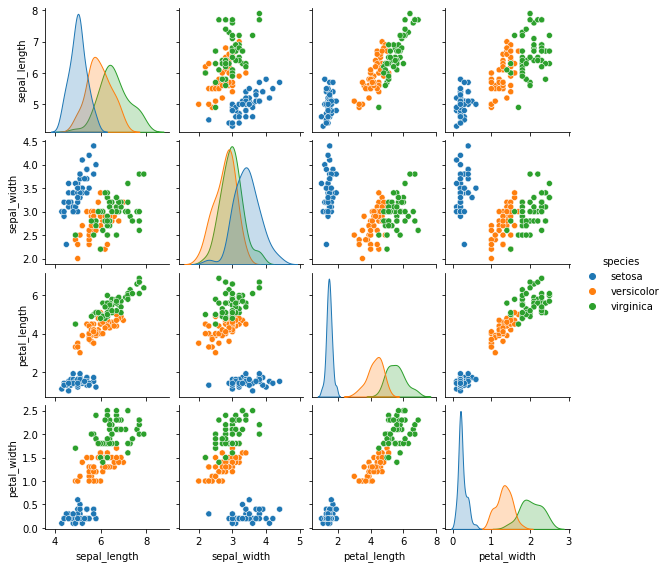

In [247]:
sns.pairplot(iris_df.iloc[:,:-1], hue='species', height=2);

# Data processing pipeline

In [231]:
num_features = iris_df.columns[:-2]
num_pipe = Pipeline(
    [
     ('num', StandardScaler())
    ]
)
proc_pipe = ColumnTransformer(
    [
     ("numproc",num_pipe, num_features)
    ]
)

In [232]:
train_x, valid_x, train_y, valid_y = train_test_split(\
                                                      iris_df[num_features], \
                                                      iris_df['species'], \
                                                      test_size=0.3,\
                                                      random_state=1)

# LogisticRegression

Training accuracy score 0.9714285714285714
Validation accuracy score 0.9555555555555556


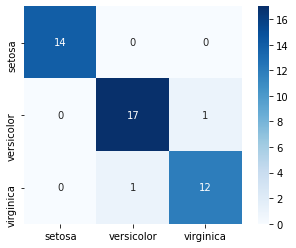

In [239]:
lr_pipe = Pipeline(
    [
     ('preprocess', proc_pipe),
     ('clf', LogisticRegression() )
    ]
)

lr_mdl = lr_pipe.fit(train_x, train_y)
train_pred = lr_mdl.predict(train_x)
print ("Training accuracy score", accuracy_score(train_y, train_pred))
valid_pred = clf_mdl.predict(valid_x)
print ("Validation accuracy score", accuracy_score(valid_y, valid_pred))
valid_cfmatrix = confusion_matrix(valid_y, valid_pred, labels=species)
# valid_cfmatrix = confusion_matrix(valid_y, valid_pred)
sns.heatmap(valid_cfmatrix, cmap=plt.cm.Blues, square=True, annot=True,
            xticklabels=species, yticklabels=species);

# Random Forest

Training accuracy score 1.0
Validation accuracy score 0.9555555555555556


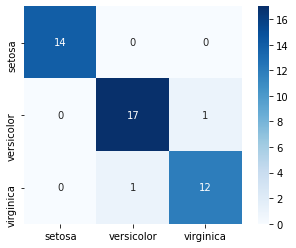

In [240]:
rf_pipe = Pipeline(
    [
     ('preprocess', proc_pipe),
     ('clf', RandomForestClassifier() )
    ]
)

rf_mdl = rf_pipe.fit(train_x, train_y)
train_pred = rf_mdl.predict(train_x)
print ("Training accuracy score", accuracy_score(train_y, train_pred))
valid_pred = clf_mdl.predict(valid_x)
print ("Validation accuracy score", accuracy_score(valid_y, valid_pred))
valid_cfmatrix = confusion_matrix(valid_y, valid_pred, labels=species)
# valid_cfmatrix = confusion_matrix(valid_y, valid_pred)
sns.heatmap(valid_cfmatrix, cmap=plt.cm.Blues, square=True, annot=True,
            xticklabels=species, yticklabels=species);

Gradient Boosted Tree

Training accuracy score 1.0
Validation accuracy score 0.9555555555555556


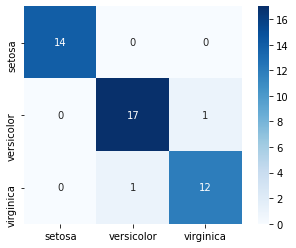

In [241]:
gbt_pipe = Pipeline(
    [
     ('preprocess', proc_pipe),
     ('clf', GradientBoostingClassifier() )
    ]
)

gbt_mdl = gbt_pipe.fit(train_x, train_y)
train_pred = gbt_mdl.predict(train_x)
print ("Training accuracy score", accuracy_score(train_y, train_pred))
valid_pred = clf_mdl.predict(valid_x)
print ("Validation accuracy score", accuracy_score(valid_y, valid_pred))
valid_cfmatrix = confusion_matrix(valid_y, valid_pred, labels=species)
# valid_cfmatrix = confusion_matrix(valid_y, valid_pred)
sns.heatmap(valid_cfmatrix, cmap=plt.cm.Blues, square=True, annot=True,
            xticklabels=species, yticklabels=species);